Evaluation of the OI for the Shower Problem
-------------------------------------------

In [10]:
from pypo import multimodel_rep, OI_eval
import numpy as np

Defining the equations for the shower problem

$$
y_1 =  u_1 + u_2 \\
y_2 = \frac{(60*u_1 +  120*u_2)}{(u_1 + u_2)} \\
if \, y_1 = 0, \\ then \, y_2 = \frac{(60+120)}{2}
$$

In [11]:
def shower_problem_2x2(u):
    y = np.zeros(2)
    y[0]=u[0]+u[1]
    if y[0]!=0:
        y[1]=(u[0]*60+u[1]*120)/(u[0]+u[1])
    else:
        y[1]=(60+120)/2
        
    return y

Defining The AIS and DOS Bounds

In [12]:
DOS_bounds =  np.array([[10, 20], 
                        [70, 100]])

AIS_bounds =  np.array([[1, 10],
                        [1, 10]])

AIS_resolution =  [5, 5]

model =  shower_problem_2x2

Obtaining the AOS from the AIS

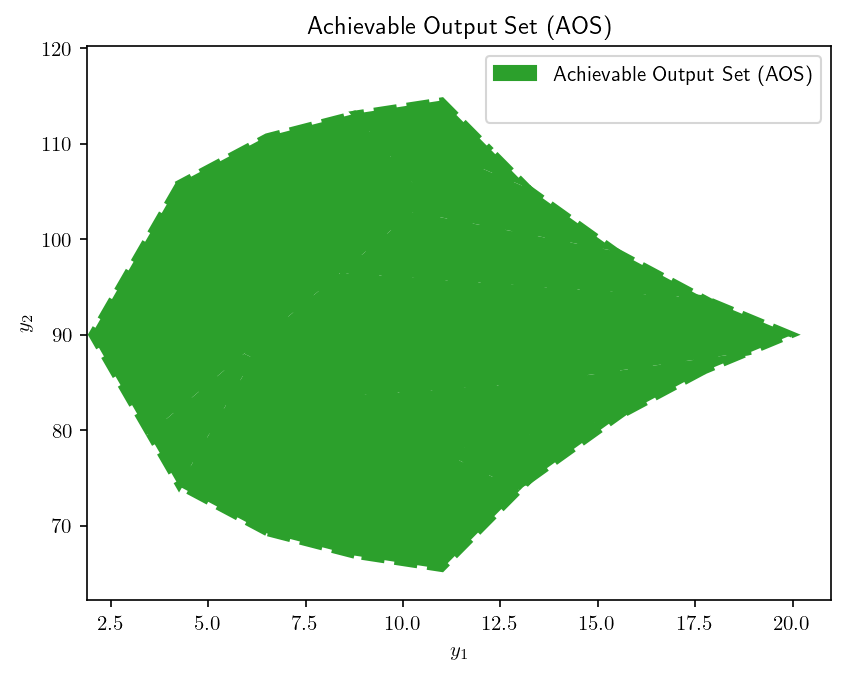

In [13]:
AOS_region  =  multimodel_rep(AIS_bounds, AIS_resolution, model)

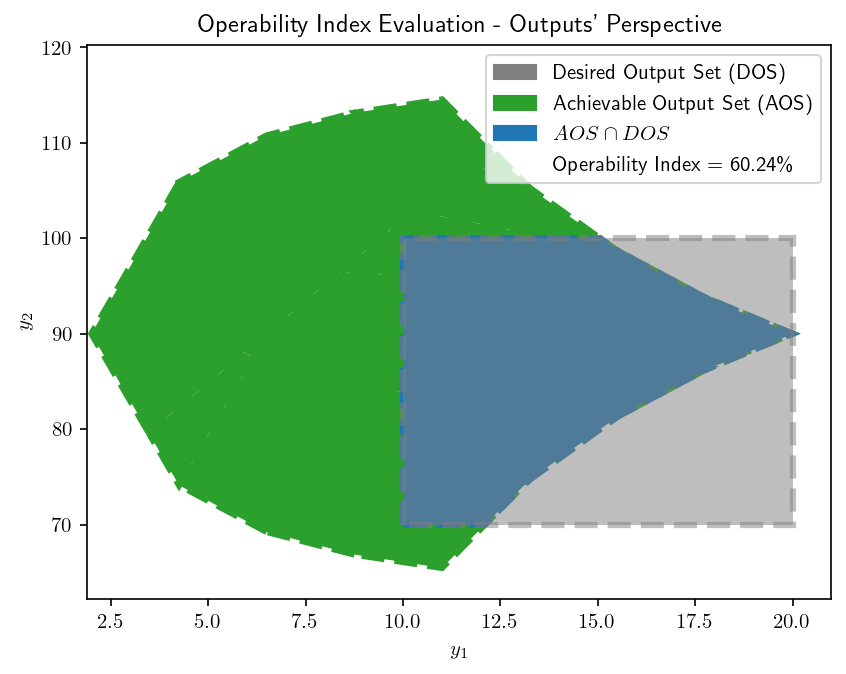

In [14]:
OI = OI_eval(AOS_region, DOS_bounds)